## WHEL's Study: Classificaion Model

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support

### Reading Dataset

In [2]:
ovt = pd.read_csv('ovrt.csv')
ovt = ovt.drop(columns=['Unnamed: 0'])
print("Shape: " + str(ovt.shape))
ovt.head()

Shape: (655, 68)


,ID,QOL_ovt,energy_ovt,genhlth_ovt,optimism_ovt,pain_ovt,socfctn_ovt,lutein_ovt,cryptox_ovt,lycopene_ovt_x,...,water_ovt,anim. protein_ovt,veg prot_ovt,vit k_ovt,trans fat acids_ovt,beta-carot_ovt,alpha-carot_ovt,beta-cryptox_ovt,lut + zeax_ovt,lycopene_ovt_y
0,1245,-32.312500,-20.0,-40.0,-2.0,-12.5,-50.0,-0.1697,-0.0465,0.3556,...,193.992493,-1.905000,8.29750,91.972500,-0.3525,1399.397461,24.567507,54.597500,1790.035065,250.457520
1,1256,-36.687500,-5.0,10.0,-3.0,-50.0,-37.5,0.0980,-0.0966,0.0129,...,722.049988,-5.290000,-6.13250,7.219999,-0.4350,-311.827454,248.392479,15.737500,-347.647522,-1278.749996
2,1265,-6.312500,-5.0,-10.0,2.0,-12.5,0.0,0.0349,-0.1795,-0.4249,...,499.857483,-38.457500,1.31500,34.244999,-1.4150,18381.732422,8353.942706,61.490000,2007.082550,26804.000000
3,1266,0.437500,-10.0,0.0,2.0,25.0,-12.5,-0.1125,-0.1744,-0.4923,...,299.345032,35.095001,-5.08750,26.660002,1.3200,-5628.977448,-1542.992467,312.769993,2945.134918,4928.824951
4,1276,30.646484,30.0,5.0,-1.0,25.0,37.5,0.0766,0.0213,-0.0547,...,51.471191,4.437499,-1.35375,-67.597503,0.7600,49091.856445,28144.247949,284.864999,92.692444,-1542.129974


In [3]:
ovt.isnull().sum().any()

False

In [4]:
ovt = ovt.assign(recurrence_y=ovt.get('recurrence'))
ovt = ovt.drop(columns='recurrence')
ovt.head()

,ID,QOL_ovt,energy_ovt,genhlth_ovt,optimism_ovt,pain_ovt,socfctn_ovt,lutein_ovt,cryptox_ovt,lycopene_ovt_x,...,anim. protein_ovt,veg prot_ovt,vit k_ovt,trans fat acids_ovt,beta-carot_ovt,alpha-carot_ovt,beta-cryptox_ovt,lut + zeax_ovt,lycopene_ovt_y,recurrence_y
0,1245,-32.312500,-20.0,-40.0,-2.0,-12.5,-50.0,-0.1697,-0.0465,0.3556,...,-1.905000,8.29750,91.972500,-0.3525,1399.397461,24.567507,54.597500,1790.035065,250.457520,0
1,1256,-36.687500,-5.0,10.0,-3.0,-50.0,-37.5,0.0980,-0.0966,0.0129,...,-5.290000,-6.13250,7.219999,-0.4350,-311.827454,248.392479,15.737500,-347.647522,-1278.749996,0
2,1265,-6.312500,-5.0,-10.0,2.0,-12.5,0.0,0.0349,-0.1795,-0.4249,...,-38.457500,1.31500,34.244999,-1.4150,18381.732422,8353.942706,61.490000,2007.082550,26804.000000,0
3,1266,0.437500,-10.0,0.0,2.0,25.0,-12.5,-0.1125,-0.1744,-0.4923,...,35.095001,-5.08750,26.660002,1.3200,-5628.977448,-1542.992467,312.769993,2945.134918,4928.824951,0
4,1276,30.646484,30.0,5.0,-1.0,25.0,37.5,0.0766,0.0213,-0.0547,...,4.437499,-1.35375,-67.597503,0.7600,49091.856445,28144.247949,284.864999,92.692444,-1542.129974,0


In [5]:
ovt['recurrence_y'].value_counts()

0    629
1     26
Name: recurrence_y, dtype: int64

### Data Preprocessing

In [6]:
# train and test datasets
x = ovt.iloc[:,:-1].values
y = ovt.iloc[:,-1].values

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state = 0)

In [7]:
# standard scaling
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### Logistic Regression

In [8]:
lr = LogisticRegression(random_state = 0)
lr.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [9]:
y_pred_lr = lr.predict(x_test)
matrix_lr = confusion_matrix(y_test, y_pred_lr)
print(matrix_lr)

acc_lr = accuracy_score(y_test, y_pred_lr)
print('\n accuracy score: ' + str(acc_lr) + '\n')

report_dict_lr = classification_report(y_test, y_pred_lr, output_dict = True)
print(classification_report(y_test, y_pred_lr))

[[158   1]
 [  5   0]]

 accuracy score: 0.9634146341463414

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       159
           1       0.00      0.00      0.00         5

    accuracy                           0.96       164
   macro avg       0.48      0.50      0.49       164
weighted avg       0.94      0.96      0.95       164



### K-Nearest Neighbours (K-NN)

In [10]:
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [11]:
y_pred_knn = knn.predict(x_test)

matrix_knn = confusion_matrix(y_test, y_pred_knn)
print(matrix_knn)

acc_knn = accuracy_score(y_test, y_pred_knn)
print('\n accuracy score: ' + str(acc_knn))

[[159   0]
 [  5   0]]

 accuracy score: 0.9695121951219512


### SVC (Support Vector Classifier) w/ Linear Kernel

In [12]:
svc = SVC(kernel = 'linear', random_state = 0)
svc.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [13]:
y_pred_svc = svc.predict(x_test)

matrix_svc = confusion_matrix(y_test, y_pred_svc)
print(matrix_svc)

acc_svc = accuracy_score(y_test, y_pred_svc)
print(acc_svc)

[[158   1]
 [  5   0]]
0.9634146341463414


### Naive Bayes

In [14]:
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [15]:
y_pred_nb = nb.predict(x_test)

matrix_nb = confusion_matrix(y_test, y_pred_nb)
print(matrix_nb)

acc_nb = accuracy_score(y_test, y_pred_nb)
print(acc_nb)

[[81 78]
 [ 3  2]]
0.5060975609756098


### Decision Tree

In [16]:
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [17]:
y_pred_dt = dt.predict(x_test)

matrix_dt = confusion_matrix(y_test, y_pred_dt)
print(matrix_dt)

acc_dt = accuracy_score(y_test, y_pred_dt)
print(acc_dt)

[[148  11]
 [  5   0]]
0.9024390243902439


### Random Forest

In [18]:
rf = RandomForestClassifier(max_depth = 2, random_state = 0)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [19]:
y_pred_rf = rf.predict(x_test)

matrix_rf = confusion_matrix(y_test, y_pred_rf)
print(matrix_rf)

acc_rf = accuracy_score(y_test, y_pred_rf)
print(acc_rf)

[[159   0]
 [  5   0]]
0.9695121951219512


### Comparing Accuracies with Different Scores
- checking to see if high accuracy is due to imbalance of data

In [20]:
# logistic regression 
matrix_lr

array([[158,   1],
       [  5,   0]], dtype=int64)

In [21]:
# knn 
matrix_knn

array([[159,   0],
       [  5,   0]], dtype=int64)

In [22]:
# svc
matrix_svc

array([[158,   1],
       [  5,   0]], dtype=int64)

In [23]:
# decision tree 
matrix_dt

array([[148,  11],
       [  5,   0]], dtype=int64)

In [24]:
# random forest 
matrix_rf

array([[159,   0],
       [  5,   0]], dtype=int64)

In [25]:
# making arrays for confusion matrix elements
matrix = [matrix_lr, matrix_knn, matrix_svc, matrix_dt, matrix_rf]
tp_array = []
fp_array = []
fn_array = []
tn_array = []

for matrix in matrix:
    tp_array.append(matrix[0][0])
    fp_array.append(matrix[0][1])
    fn_array.append(matrix[1][0])
    tn_array.append(matrix[1][1])

In [26]:
# acc score 
acc_array = [acc_lr, acc_knn, acc_svc, acc_dt, acc_rf]

In [27]:
dict_for_matrix = {
    'model':['logistic', 'knn', 'svc', 'decision tree', 'random forest'],
    'tp':tp_array,
    'fp':fp_array,
    'fn':fn_array,
    'tn':tn_array,
    'accuracy':acc_array
}

score_compare = pd.DataFrame(data=dict_for_matrix)
score_compare

,model,tp,fp,fn,tn,accuracy
0,logistic,158,1,5,0,0.963415
1,knn,159,0,5,0,0.969512
2,svc,158,1,5,0,0.963415
3,decision tree,148,11,5,0,0.902439
4,random forest,159,0,5,0,0.969512


### Getting Arrays of Different Types of Scores

#### sklearn precision_recall_fscore_support

- **micro**:
    - Calculate metrics globally by **counting the total** true positives, false negatives and false positives.
    
    
- **macro**:
    - Calculate metrics for each label, and find their unweighted mean. This **does not take label imbalance into account**.
    
    
- **weighted**:
    - Calculate metrics for each label, and find their **average weighted by support** (the number of true instances for each label).

In [28]:
# precision, recall, f_score
pred_array = [y_pred_lr, y_pred_knn, y_pred_svc, y_pred_dt, y_pred_rf]

    # micro
precision_micro= []
recall_micro = []
fscore_micro = []

for y_pred in pred_array:
    scores = precision_recall_fscore_support(y_test, y_pred, average='micro')
    precision_micro.append(scores[0])
    recall_micro.append(scores[1])
    fscore_micro.append(scores[2])

    # macro
precision_macro = []
recall_macro = []
fscore_macro = []

for y_pred in pred_array:
    scores = precision_recall_fscore_support(y_test, y_pred, average='macro', zero_division = 0)
    precision_macro.append(scores[0])
    recall_macro.append(scores[1])
    fscore_macro.append(scores[2])

    # weighted 
precision_weighted = []
recall_weighted = []
fscore_weighted = []

for y_pred in pred_array:
    scores = precision_recall_fscore_support(y_test, y_pred, average='weighted', zero_division = 0)
    precision_weighted.append(scores[0])
    recall_weighted.append(scores[1])
    fscore_weighted.append(scores[2])

In [29]:
all_scores = [precision_micro, recall_micro, fscore_micro,
              precision_macro, recall_macro, fscore_macro,
              precision_weighted, recall_weighted, fscore_weighted]

all_scores_strs = ['precision_micro', 'recall_micro', 'fscore_micro',
                      'precision_macro', 'recall_macro', 'fscore_macro',
                      'precision_weighted', 'recall_weighted', 'fscore_weighted']

for i in np.arange(len(all_scores)):
    score_compare[all_scores_strs[i]] = all_scores[i]
    
score_compare

,model,tp,fp,fn,tn,accuracy,precision_micro,recall_micro,fscore_micro,precision_macro,recall_macro,fscore_macro,precision_weighted,recall_weighted,fscore_weighted
0,logistic,158,1,5,0,0.963415,0.963415,0.963415,0.963415,0.484663,0.496855,0.490683,0.939773,0.963415,0.951447
1,knn,159,0,5,0,0.969512,0.969512,0.969512,0.969512,0.484756,0.500000,0.492260,0.939954,0.969512,0.954504
2,svc,158,1,5,0,0.963415,0.963415,0.963415,0.963415,0.484663,0.496855,0.490683,0.939773,0.963415,0.951447
3,decision tree,148,11,5,0,0.902439,0.902439,0.902439,0.902439,0.483660,0.465409,0.474359,0.937829,0.902439,0.919794
4,random forest,159,0,5,0,0.969512,0.969512,0.969512,0.969512,0.484756,0.500000,0.492260,0.939954,0.969512,0.954504


#### Every model did not correctly predict negative/minority values !!

# Handling Imbalanced Data

In [30]:
# setup target and features 
X = ovt.drop('recurrence_y', axis=1)
y = ovt.recurrence_y

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 27)

#### Functions to calculate scores from confusion matrix

In [31]:
# sensitivity, recall, true positive rate (TPR)
def sensitivity(matrix):
    return (matrix[0][0] / (matrix[0][0] + matrix[0][1]))

# specificity, true negative rate (TNR)
def specificity(matrix):
    return (matrix[1][1] / (matrix[1][1] + matrix[1][0]))

# precision, positive predictive value (PPV)
def precision(matrix):
    return (matrix[0][0] / (matrix[0][0] + matrix[1][0]))

# neg predictive value (NPV) 
def neg_pred(matrix):
    return (matrix[1][1] / (matrix[1][1] + matrix[0][1]))

# accuracy 
def accuracy(matrix):
    total = matrix[0][0] + matrix[0][1] + matrix[1][0] + matrix[1][1]
    return((matrix[0][0] + matrix[1][1]) / total)

# f1 score 
def f1(matrix):
    return 2 * ((precision(matrix) * sensitivity(matrix)) / ((precision(matrix) + sensitivity(matrix))))

## Oversampling minority values
- 1:1 ratio for recurrence and no recurrence

### Preparing Upsampled Dataset

In [32]:
from sklearn.utils import resample

In [33]:
# concatenate training data 
X = pd.concat([X_train, y_train], axis = 1)

# separate recurrence 
recur = X[X.recurrence_y == 1]
no_recur = X[X.recurrence_y == 0]

# upsample recur 
recur_upsample = resample(recur, replace=True, n_samples = len(no_recur), random_state=27)

# concatenate recur_upsample w/ no_recur
upsampled = pd.concat([recur_upsample, no_recur])
print(upsampled['recurrence_y'].value_counts())
upsampled

1    472
0    472
Name: recurrence_y, dtype: int64


,ID,QOL_ovt,energy_ovt,genhlth_ovt,optimism_ovt,pain_ovt,socfctn_ovt,lutein_ovt,cryptox_ovt,lycopene_ovt_x,...,anim. protein_ovt,veg prot_ovt,vit k_ovt,trans fat acids_ovt,beta-carot_ovt,alpha-carot_ovt,beta-cryptox_ovt,lut + zeax_ovt,lycopene_ovt_y,recurrence_y
90,1563,-33.000000,-15.0,-20.0,-2.0,-50.0,-50.0,-0.1803,-0.0641,-0.0653,...,-32.947501,-0.870000,-10.697500,-2.125000,-3907.012512,-602.619993,47.575002,-1360.074982,-1941.460022,1
280,5569,23.187500,15.0,25.0,1.0,37.5,0.0,-0.1222,-0.0517,-0.0881,...,-8.347499,-11.359781,68.120159,-0.620000,-4068.430603,-1449.521559,-113.379025,2903.879883,3417.245148,1
301,7249,13.312500,20.0,0.0,1.0,12.5,25.0,0.3212,-0.1231,-0.0470,...,51.647499,5.664999,280.604993,-0.827500,-330.902466,-988.262498,147.067505,4820.094910,-4219.902496,1
118,3299,7.292969,0.0,0.0,2.0,0.0,0.0,-0.0577,-0.0268,0.2490,...,-7.393334,-8.216667,-30.206667,-1.660000,-255.756662,16.306667,0.013333,-127.093327,-277.916667,1
323,7305,-1.062500,0.0,5.0,4.0,-12.5,0.0,-0.1185,-0.0006,-0.1543,...,47.772501,0.037500,216.257505,1.020000,2670.470001,613.504995,-34.115000,3778.469971,25802.546875,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,11364,-0.500000,0.0,0.0,-1.0,0.0,0.0,0.0064,-0.0249,0.1288,...,-9.735001,-7.532500,6.489999,-2.292500,2516.677422,1373.625061,40.642502,-179.537491,-2916.944992,0
24,1336,-1.812500,0.0,-15.0,0.0,12.5,0.0,-0.1043,0.0366,-0.0260,...,-10.716667,7.506667,-146.506662,-0.120000,-7652.549967,-1443.716703,1345.376664,-7324.056641,-2727.230021,0
293,7225,1.312500,-15.0,0.0,-5.0,12.5,0.0,0.0231,0.1902,0.1563,...,-8.310000,-5.519688,-76.642499,-0.637500,-6475.266724,-181.466107,117.787504,-1973.379974,40158.705566,0
543,11390,-0.062500,-5.0,5.0,-2.0,-25.0,12.5,-0.0465,0.4856,-0.0796,...,9.213336,-0.913334,112.656666,1.936667,-1941.713379,-816.603345,-282.173321,3137.016642,27866.732422,0


### Testing Models with Upsampled Dataset 

In [34]:
# setup training data with new upsampled dataset
y_train_up = upsampled.recurrence_y
X_train_up = upsampled.drop('recurrence_y', axis=1)

In [35]:
# standard scaling
sc = StandardScaler()

X_train_up = sc.fit_transform(X_train_up)
X_test = sc.transform(X_test)

#### Logistic Regression

In [36]:
lr = LogisticRegression(random_state = 0)
lr.fit(X_train_up, y_train_up)

LogisticRegression(random_state=0)

In [37]:
lr_upsample_y_pred = lr.predict(X_test)
lr_upsample_matrix = confusion_matrix(y_test, lr_upsample_y_pred )
lr_upsample_matrix

array([[132,  25],
       [  6,   1]], dtype=int64)

In [38]:
print("UPSAMPLE LINEAR REGRESSION SCORES\n")

lr_up_tpr = sensitivity(lr_upsample_matrix)
print("sensitivity(TPR): " + str(lr_up_tpr))

lr_up_tnr = specificity(lr_upsample_matrix)
print("specificity(TNR): " + str(lr_up_tnr))

lr_up_ppv = precision(lr_upsample_matrix)
print("precision(PPV): " + str(lr_up_ppv))

lr_up_neg_predscore = neg_pred(lr_upsample_matrix)
print("negative predictive value: " + str(lr_up_neg_predscore))

lr_up_acc = accuracy(lr_upsample_matrix)
print("accuracy: " + str(lr_up_acc))

lr_up_f1 = f1(lr_upsample_matrix)
print("f1: " + str(lr_up_f1))

UPSAMPLE LINEAR REGRESSION SCORES

sensitivity(TPR): 0.8407643312101911
specificity(TNR): 0.14285714285714285
precision(PPV): 0.9565217391304348
negative predictive value: 0.038461538461538464
accuracy: 0.8109756097560976
f1: 0.8949152542372882


#### KNN

In [39]:
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train_up, y_train_up)

KNeighborsClassifier()

In [40]:
knn_upsample_y_pred = knn.predict(X_test)
knn_upsample_matrix = confusion_matrix(y_test, knn_upsample_y_pred)
knn_upsample_matrix

array([[144,  13],
       [  6,   1]], dtype=int64)

In [41]:
print("UPSAMPLE KNN SCORES\n")

knn_up_tpr = sensitivity(knn_upsample_matrix)
print("sensitivity(TPR): " + str(knn_up_tpr))

knn_up_tnr = specificity(knn_upsample_matrix)
print("specificity(TNR): " + str(knn_up_tnr))

knn_up_ppv = precision(knn_upsample_matrix)
print("precision(PPV): " + str(knn_up_ppv))

knn_up_neg_predscore = neg_pred(knn_upsample_matrix)
print("negative predictive value: " + str(knn_up_neg_predscore))

knn_up_acc = accuracy(knn_upsample_matrix)
print("accuracy: " + str(knn_up_acc))

knn_up_f1 = f1(knn_upsample_matrix)
print("f1: " + str(knn_up_f1))

UPSAMPLE KNN SCORES

sensitivity(TPR): 0.9171974522292994
specificity(TNR): 0.14285714285714285
precision(PPV): 0.96
negative predictive value: 0.07142857142857142
accuracy: 0.8841463414634146
f1: 0.9381107491856677


#### SVC

In [42]:
svc = SVC(kernel = 'linear', random_state = 0)
svc.fit(X_train_up, y_train_up)

SVC(kernel='linear', random_state=0)

In [43]:
svc_upsample_y_pred = svc.predict(X_test)
svc_upsample_matrix = confusion_matrix(y_test, svc_upsample_y_pred)
svc_upsample_matrix

array([[131,  26],
       [  5,   2]], dtype=int64)

In [44]:
print("UPSAMPLE SVC SCORES\n")

svc_up_tpr = sensitivity(svc_upsample_matrix)
print("sensitivity(TPR): " + str(svc_up_tpr))

svc_up_tnr = specificity(svc_upsample_matrix)
print("specificity(TNR): " + str(svc_up_tnr))

svc_up_ppv = precision(svc_upsample_matrix)
print("precision(PPV): " + str(svc_up_ppv))

svc_up_neg_predscore = neg_pred(svc_upsample_matrix)
print("negative predictive value: " + str(svc_up_neg_predscore))

svc_up_acc = accuracy(svc_upsample_matrix)
print("accuracy: " + str(svc_up_acc))

svc_up_f1 = f1(svc_upsample_matrix)
print("f1: " + str(svc_up_f1))

UPSAMPLE SVC SCORES

sensitivity(TPR): 0.8343949044585988
specificity(TNR): 0.2857142857142857
precision(PPV): 0.9632352941176471
negative predictive value: 0.07142857142857142
accuracy: 0.8109756097560976
f1: 0.89419795221843


#### Decision Tree

In [45]:
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt.fit(X_train_up, y_train_up)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [46]:
dt_upsample_y_pred = dt.predict(X_test)
dt_upsample_matrix = confusion_matrix(y_test, dt_upsample_y_pred)
dt_upsample_matrix

array([[153,   4],
       [  7,   0]], dtype=int64)

In [47]:
print("UPSAMPLE DECISION TREE SCORES\n")

dt_up_tpr = sensitivity(dt_upsample_matrix)
print("sensitivity(TPR): " + str(dt_up_tpr))

dt_up_tnr = specificity(dt_upsample_matrix)
print("specificity(TNR): " + str(dt_up_tnr))

dt_up_ppv = precision(dt_upsample_matrix)
print("precision(PPV): " + str(dt_up_ppv))

dt_up_neg_predscore = neg_pred(dt_upsample_matrix)
print("negative predictive value: " + str(dt_up_neg_predscore))

dt_up_acc = accuracy(dt_upsample_matrix)
print("accuracy: " + str(dt_up_acc))

dt_up_f1 = f1(dt_upsample_matrix)
print("f1: " + str(dt_up_f1))

UPSAMPLE DECISION TREE SCORES

sensitivity(TPR): 0.9745222929936306
specificity(TNR): 0.0
precision(PPV): 0.95625
negative predictive value: 0.0
accuracy: 0.9329268292682927
f1: 0.9652996845425867


#### Random Forest

In [48]:
rf = RandomForestClassifier(max_depth = 2, random_state = 0)
rf.fit(X_train_up, y_train_up)

RandomForestClassifier(max_depth=2, random_state=0)

In [49]:
rf_upsample_y_pred = rf.predict(X_test)

rf_upsample_matrix = confusion_matrix(y_test, rf_upsample_y_pred)
rf_upsample_matrix

array([[145,  12],
       [  6,   1]], dtype=int64)

In [50]:
print("UPSAMPLE RANDOM FOREST SCORES\n")

rf_up_tpr = sensitivity(rf_upsample_matrix)
print("sensitivity (TPR): " + str(rf_up_tpr))

rf_up_tnr = specificity(rf_upsample_matrix)
print("specificity (TNR): " + str(rf_up_tnr))

rf_up_ppv = precision(rf_upsample_matrix)
print("precision (PPV): " + str(rf_up_ppv))

rf_up_neg_predscore = neg_pred(rf_upsample_matrix)
print("negative predictive value: " + str(rf_up_neg_predscore))

rf_up_acc = accuracy(rf_upsample_matrix)
print("accuracy: " + str(rf_up_acc))

rf_up_f1 = f1(rf_upsample_matrix)
print("f1: " + str(rf_up_f1))

UPSAMPLE RANDOM FOREST SCORES

sensitivity (TPR): 0.9235668789808917
specificity (TNR): 0.14285714285714285
precision (PPV): 0.9602649006622517
negative predictive value: 0.07692307692307693
accuracy: 0.8902439024390244
f1: 0.9415584415584416


## Undersampling majority class (downsample)

### Preparing Downsampled Dataset

In [51]:
no_recur_downsampled = resample(no_recur, replace = False, n_samples = len(recur) * 4, random_state = 27)

downsampled = pd.concat([no_recur_downsampled, recur])
downsampled.recurrence_y.value_counts()

0    76
1    19
Name: recurrence_y, dtype: int64

In [52]:
# downsample training datasets (note: still using X_test and y_test)
y_train_down = downsampled.recurrence_y
X_train_down = downsampled.drop('recurrence_y', axis=1)

### Testing Models with Downsampled Dataset 

#### Logistic Regression

In [53]:
lr = LogisticRegression(random_state = 0)
lr.fit(X_train_down, y_train_down)

LogisticRegression(random_state=0)

In [54]:
lr_downsample_y_pred = lr.predict(X_test)

lr_downsample_matrix = confusion_matrix(y_test, lr_downsample_y_pred)
lr_downsample_matrix

array([[90, 67],
       [ 4,  3]], dtype=int64)

In [55]:
print("DOWNSAMPLE LOGISTIC REGRESSION SCORES\n")

lr_down_tpr = sensitivity(lr_downsample_matrix)
print("sensitivity (TPR): " + str(lr_down_tpr))

lr_down_tnr = specificity(lr_downsample_matrix)
print("specificity (TNR): " + str(lr_down_tnr))

lr_down_ppv = precision(lr_downsample_matrix)
print("precision (PPV): " + str(lr_down_ppv))

lr_down_neg_predscore = neg_pred(lr_downsample_matrix)
print("negative predictive value: " + str(lr_down_neg_predscore))

lr_down_acc = accuracy(lr_downsample_matrix)
print("accuracy: " + str(lr_down_acc))

lr_down_f1 = f1(lr_downsample_matrix)
print("f1: " + str(lr_down_f1))

DOWNSAMPLE LOGISTIC REGRESSION SCORES

sensitivity (TPR): 0.5732484076433121
specificity (TNR): 0.42857142857142855
precision (PPV): 0.9574468085106383
negative predictive value: 0.04285714285714286
accuracy: 0.5670731707317073
f1: 0.7171314741035857


#### KNN

In [56]:
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train_down, y_train_down)

KNeighborsClassifier()

In [57]:
knn_downsample_y_pred = knn.predict(X_test)

knn_downsample_matrix = confusion_matrix(y_test, knn_downsample_y_pred)
knn_downsample_matrix

array([[157,   0],
       [  7,   0]], dtype=int64)

In [58]:
print("DOWNSAMPLE KNN SCORES\n")

knn_down_tpr = sensitivity(knn_downsample_matrix)
print("sensitivity (TPR): " + str(knn_down_tpr))

knn_down_tnr = specificity(knn_downsample_matrix)
print("specificity (TNR): " + str(knn_down_tnr))

knn_down_ppv = precision(knn_downsample_matrix)
print("precision (PPV): " + str(knn_down_ppv))

knn_down_neg_predscore = neg_pred(knn_downsample_matrix)
print("negative predictive value: " + str(knn_down_neg_predscore))

knn_down_acc = accuracy(knn_downsample_matrix)
print("accuracy: " + str(knn_down_acc))

knn_down_f1 = f1(knn_downsample_matrix)
print("f1: " + str(knn_down_f1))

DOWNSAMPLE KNN SCORES

sensitivity (TPR): 1.0
specificity (TNR): 0.0
precision (PPV): 0.9573170731707317
negative predictive value: nan
accuracy: 0.9573170731707317
f1: 0.9781931464174455


#### SVC

In [59]:
# svc = SVC(kernel = 'linear', random_state = 0)
# svc.fit(X_train_down, y_train_down)

In [60]:
# svc_downsample_y_pred = svc.predict(X_test)

# svc_downsample_matrix = confusion_matrix(y_test, svc_downsample_y_pred)
# svc_downsample_matrix

In [61]:
# print("DOWNSAMPLE SVC SCORES\n")

# svc_down_tpr = sensitivity(svc_downsample_matrix)
# print("sensitivity (TPR): " + str(svc_down_tpr))

# svc_down_tnr = specificity(svc_downsample_matrix)
# print("specificity (TNR): " + str(svc_down_tnr))

# svc_down_ppv = precision(svc_downsample_matrix)
# print("precision (PPV): " + str(svc_down_ppv))

# svc_down_neg_predscore = neg_pred(svc_downsample_matrix)
# print("negative predictive value: " + str(svc_down_neg_predscore))

# svc_down_acc = accuracy(svc_downsample_matrix)
# print("accuracy: " + str(svc_down_acc))

# svc_down_f1 = f1(svc_downsample_matrix)
# print("f1: " + str(svc_down_f1))

In [62]:
# BECAUSE RUNNING SVC TAKES TOO LONG: 
svc_down_tpr = 1.0
svc_down_tnr = 0.0
svc_down_ppv = 0.9573170731707317
svc_down_neg_predscore = np.nan
svc_down_acc = 0.9573170731707317
svc_down_f1 = 0.9781931464174455

#### Decision Tree

In [63]:
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt.fit(X_train_down, y_train_down)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [64]:
dt_downsample_y_pred = dt.predict(X_test)

dt_downsample_matrix = confusion_matrix(y_test, dt_downsample_y_pred)
dt_downsample_matrix

array([[149,   8],
       [  7,   0]], dtype=int64)

In [65]:
print("DOWNSAMPLE DECISION TREE SCORES\n")

dt_down_tpr = sensitivity(dt_downsample_matrix)
print("sensitivity (TPR): " + str(dt_down_tpr))

dt_down_tnr = specificity(dt_downsample_matrix)
print("specificity (TNR): " + str(dt_down_tnr))

dt_down_ppv = precision(dt_downsample_matrix)
print("precision (PPV): " + str(dt_down_ppv))

dt_down_neg_predscore = neg_pred(dt_downsample_matrix)
print("negative predictive value: " + str(dt_down_neg_predscore))

dt_down_acc = accuracy(dt_downsample_matrix)
print("accuracy: " + str(dt_down_acc))

dt_down_f1 = f1(dt_downsample_matrix)
print("f1: " + str(dt_down_f1))

DOWNSAMPLE DECISION TREE SCORES

sensitivity (TPR): 0.9490445859872612
specificity (TNR): 0.0
precision (PPV): 0.9551282051282052
negative predictive value: 0.0
accuracy: 0.9085365853658537
f1: 0.952076677316294


#### Random Forest

In [66]:
rf = RandomForestClassifier(max_depth = 2, random_state = 0)
rf.fit(X_train_down, y_train_down)

RandomForestClassifier(max_depth=2, random_state=0)

In [67]:
rf_downsample_y_pred = rf.predict(X_test)

rf_downsample_matrix = confusion_matrix(y_test, rf_downsample_y_pred)
rf_downsample_matrix

array([[157,   0],
       [  7,   0]], dtype=int64)

In [68]:
print("DOWNSAMPLE RANDOM FOREST SCORES\n")

rf_down_tpr = sensitivity(rf_downsample_matrix)
print("sensitivity (TPR): " + str(rf_down_tpr))

rf_down_tnr = specificity(rf_downsample_matrix)
print("specificity (TNR): " + str(rf_down_tnr))

rf_down_ppv = precision(rf_downsample_matrix)
print("precision (PPV): " + str(rf_down_ppv))

rf_down_neg_predscore = neg_pred(rf_downsample_matrix)
print("negative predictive value: " + str(rf_down_neg_predscore))

rf_down_acc = accuracy(rf_downsample_matrix)
print("accuracy: " + str(rf_down_acc))

rf_down_f1 = f1(rf_downsample_matrix)
print("f1: " + str(rf_down_f1))

DOWNSAMPLE RANDOM FOREST SCORES

sensitivity (TPR): 1.0
specificity (TNR): 0.0
precision (PPV): 0.9573170731707317
negative predictive value: nan
accuracy: 0.9573170731707317
f1: 0.9781931464174455


## Generating Synthetic Samples (SMOTE)

In [69]:
from imblearn.over_sampling import SMOTE

In [70]:
# # setting up testing and training sets (again)
y = ovt.recurrence_y
X = ovt.drop('recurrence_y', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

# standard scaling
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [71]:
sm = SMOTE(random_state = 2)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train.ravel())

In [72]:
X_train_smote.shape, y_train_smote.shape

((944, 67), (944,))

In [73]:
# TRAINING : X_train_smote, y_train_smote 
# TESTING: X_test, y_test

### Testing Models from SMOTE

#### Logistic Regression

In [74]:
lr = LogisticRegression(random_state = 0)
lr.fit(X_train_smote, y_train_smote)

LogisticRegression(random_state=0)

In [75]:
lr_smote_y_pred = lr.predict(X_test)
lr_smote_matrix = confusion_matrix(y_test, lr_smote_y_pred)
lr_smote_matrix

array([[132,  25],
       [  6,   1]], dtype=int64)

In [76]:
print("SMOTE LINEAR REGRESSION SCORES\n")

lr_sm_tpr = sensitivity(lr_smote_matrix)
print("sensitivity(TPR): " + str(lr_sm_tpr))

lr_sm_tnr = specificity(lr_smote_matrix)
print("specificity(TNR): " + str(lr_sm_tnr))

lr_sm_ppv = precision(lr_smote_matrix)
print("precision(PPV): " + str(lr_sm_ppv))

lr_sm_neg_predscore = neg_pred(lr_smote_matrix)
print("negative predictive value: " + str(lr_sm_neg_predscore))

lr_sm_acc = accuracy(lr_smote_matrix)
print("accuracy: " + str(lr_sm_acc))

lr_sm_f1 = f1(lr_smote_matrix)
print("f1: " + str(lr_sm_f1))

SMOTE LINEAR REGRESSION SCORES

sensitivity(TPR): 0.8407643312101911
specificity(TNR): 0.14285714285714285
precision(PPV): 0.9565217391304348
negative predictive value: 0.038461538461538464
accuracy: 0.8109756097560976
f1: 0.8949152542372882


#### KNN

In [77]:
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train_smote, y_train_smote)

KNeighborsClassifier()

In [78]:
knn_smote_y_pred = knn.predict(X_test)
knn_smote_matrix = confusion_matrix(y_test, knn_smote_y_pred)
knn_smote_matrix

array([[78, 79],
       [ 4,  3]], dtype=int64)

In [79]:
print("SMOTE KNN SCORES\n")

knn_sm_tpr = sensitivity(knn_smote_matrix)
print("sensitivity(TPR): " + str(knn_sm_tpr))

knn_sm_tnr = specificity(knn_smote_matrix)
print("specificity(TNR): " + str(knn_sm_tnr))

knn_sm_ppv = precision(knn_smote_matrix)
print("precision(PPV): " + str(knn_sm_ppv))

knn_sm_neg_predscore = neg_pred(knn_smote_matrix)
print("negative predictive value: " + str(knn_sm_neg_predscore))

knn_sm_acc = accuracy(knn_smote_matrix)
print("accuracy: " + str(knn_sm_acc))

knn_sm_f1 = f1(knn_smote_matrix)
print("f1: " + str(knn_sm_f1))

SMOTE KNN SCORES

sensitivity(TPR): 0.4968152866242038
specificity(TNR): 0.42857142857142855
precision(PPV): 0.9512195121951219
negative predictive value: 0.036585365853658534
accuracy: 0.49390243902439024
f1: 0.6527196652719666


#### SVC 

In [80]:
svc = SVC(kernel = 'linear', random_state = 0)
svc.fit(X_train_smote, y_train_smote)

SVC(kernel='linear', random_state=0)

In [81]:
svc_smote_y_pred = svc.predict(X_test)
svc_smote_matrix = confusion_matrix(y_test, svc_smote_y_pred)
svc_smote_matrix

array([[130,  27],
       [  5,   2]], dtype=int64)

In [82]:
print("SMOTE SVC SCORES\n")

svc_sm_tpr = sensitivity(svc_smote_matrix)
print("sensitivity(TPR): " + str(svc_sm_tpr))

svc_sm_tnr = specificity(svc_smote_matrix)
print("specificity(TNR): " + str(svc_sm_tnr))

svc_sm_ppv = precision(svc_smote_matrix)
print("precision(PPV): " + str(svc_sm_ppv))

svc_sm_neg_predscore = neg_pred(svc_smote_matrix)
print("negative predictive value: " + str(svc_sm_neg_predscore))

svc_sm_acc = accuracy(svc_smote_matrix)
print("accuracy: " + str(svc_sm_acc))

svc_sm_f1 = f1(svc_smote_matrix)
print("f1: " + str(svc_sm_f1))

SMOTE SVC SCORES

sensitivity(TPR): 0.8280254777070064
specificity(TNR): 0.2857142857142857
precision(PPV): 0.9629629629629629
negative predictive value: 0.06896551724137931
accuracy: 0.8048780487804879
f1: 0.8904109589041095


#### Decision Tree 

In [83]:
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [84]:
dt_smote_y_pred = dt.predict(X_test)
dt_smote_matrix = confusion_matrix(y_test, dt_smote_y_pred)
dt_smote_matrix

array([[140,  17],
       [  5,   2]], dtype=int64)

In [85]:
print("SMOTE DECISION TREE SCORES\n")

dt_sm_tpr = sensitivity(dt_smote_matrix)
print("sensitivity(TPR): " + str(dt_sm_tpr))

dt_sm_tnr = specificity(dt_smote_matrix)
print("specificity(TNR): " + str(dt_sm_tnr))

dt_sm_ppv = precision(dt_smote_matrix)
print("precision(PPV): " + str(dt_sm_ppv))

dt_sm_neg_predscore = neg_pred(dt_smote_matrix)
print("negative predictive value: " + str(dt_sm_neg_predscore))

dt_sm_acc = accuracy(dt_smote_matrix)
print("accuracy: " + str(dt_sm_acc))

dt_sm_f1 = f1(dt_smote_matrix)
print("f1: " + str(dt_sm_f1))

SMOTE DECISION TREE SCORES

sensitivity(TPR): 0.89171974522293
specificity(TNR): 0.2857142857142857
precision(PPV): 0.9655172413793104
negative predictive value: 0.10526315789473684
accuracy: 0.8658536585365854
f1: 0.9271523178807949


#### Random Forest

In [86]:
rf = RandomForestClassifier(max_depth = 2, random_state = 0)
rf.fit(X_train_smote, y_train_smote)

RandomForestClassifier(max_depth=2, random_state=0)

In [87]:
rf_smote_y_pred = rf.predict(X_test)
rf_smote_matrix = confusion_matrix(y_test, rf_smote_y_pred)
rf_smote_matrix

array([[139,  18],
       [  7,   0]], dtype=int64)

In [88]:
print("SMOTE RANDOM FOREST SCORES\n")

rf_sm_tpr = sensitivity(rf_smote_matrix)
print("sensitivity (TPR): " + str(rf_sm_tpr))

rf_sm_tnr = specificity(rf_smote_matrix)
print("specificity (TNR): " + str(rf_sm_tnr))

rf_sm_ppv = precision(rf_smote_matrix)
print("precision (PPV): " + str(rf_sm_ppv))

rf_sm_neg_predscore = neg_pred(rf_smote_matrix)
print("negative predictive value: " + str(rf_sm_neg_predscore))

rf_sm_acc = accuracy(rf_smote_matrix)
print("accuracy: " + str(rf_sm_acc))

rf_sm_f1 = f1(rf_smote_matrix)
print("f1: " + str(rf_sm_f1))

SMOTE RANDOM FOREST SCORES

sensitivity (TPR): 0.8853503184713376
specificity (TNR): 0.0
precision (PPV): 0.952054794520548
negative predictive value: 0.0
accuracy: 0.8475609756097561
f1: 0.9174917491749175


## Comparing all Scores 

### Storing Scores from Original Data (ovt) 

In [89]:
# logistic regression
print("LINEAR REGRESSION SCORES (original data) \n")

lr_tpr = sensitivity(matrix_lr)
print("sensitivity (TPR): " + str(lr_tpr))

lr_tnr = specificity(matrix_lr)
print("specificity (TNR): " + str(lr_tnr))

lr_ppv = precision(matrix_lr)
print("precision (PPV): " + str(lr_ppv))

lr_neg_predscore = neg_pred(matrix_lr)
print("negative predictive value: " + str(lr_neg_predscore))

lr_acc = accuracy(matrix_lr)
print("accuracy: " + str(lr_acc))

lr_f1 = f1(matrix_lr)
print("f1: " + str(lr_f1))

LINEAR REGRESSION SCORES (original data) 

sensitivity (TPR): 0.9937106918238994
specificity (TNR): 0.0
precision (PPV): 0.9693251533742331
negative predictive value: 0.0
accuracy: 0.9634146341463414
f1: 0.9813664596273292


In [90]:
# knn 
print("KNN SCORES (original data) \n")

knn_tpr = sensitivity(matrix_knn)
print("sensitivity (TPR): " + str(knn_tpr))

knn_tnr = specificity(matrix_knn)
print("specificity (TNR): " + str(knn_tnr))

knn_ppv = precision(matrix_knn)
print("precision (PPV): " + str(knn_ppv))

knn_neg_predscore = neg_pred(matrix_knn)
print("negative predictive value: " + str(knn_neg_predscore))

knn_acc = accuracy(matrix_knn)
print("accuracy: " + str(knn_acc))

knn_f1 = f1(matrix_knn)
print("f1: " + str(knn_f1))

KNN SCORES (original data) 

sensitivity (TPR): 1.0
specificity (TNR): 0.0
precision (PPV): 0.9695121951219512
negative predictive value: nan
accuracy: 0.9695121951219512
f1: 0.9845201238390092


In [91]:
# svc 
print("SVC SCORES (original data) \n")

svc_tpr = sensitivity(matrix_svc)
print("sensitivity (TPR): " + str(svc_tpr))

svc_tnr = specificity(matrix_svc)
print("specificity (TNR): " + str(svc_tnr))

svc_ppv = precision(matrix_svc)
print("precision (PPV): " + str(svc_ppv))

svc_neg_predscore = neg_pred(matrix_svc)
print("negative predictive value: " + str(svc_neg_predscore))

svc_acc = accuracy(matrix_svc)
print("accuracy: " + str(svc_acc))

svc_f1 = f1(matrix_svc)
print("f1: " + str(svc_f1))

SVC SCORES (original data) 

sensitivity (TPR): 0.9937106918238994
specificity (TNR): 0.0
precision (PPV): 0.9693251533742331
negative predictive value: 0.0
accuracy: 0.9634146341463414
f1: 0.9813664596273292


In [92]:
# decision tree 
print("SVC SCORES (original data) \n")

dt_tpr = sensitivity(matrix_dt)
print("sensitivity (TPR): " + str(dt_tpr))

dt_tnr = specificity(matrix_dt)
print("specificity (TNR): " + str(dt_tnr))

dt_ppv = precision(matrix_dt)
print("precision (PPV): " + str(dt_ppv))

dt_neg_predscore = neg_pred(matrix_dt)
print("negative predictive value: " + str(dt_neg_predscore))

dt_acc = accuracy(matrix_dt)
print("accuracy: " + str(dt_acc))

dt_f1 = f1(matrix_dt)
print("f1: " + str(dt_f1))

SVC SCORES (original data) 

sensitivity (TPR): 0.9308176100628931
specificity (TNR): 0.0
precision (PPV): 0.9673202614379085
negative predictive value: 0.0
accuracy: 0.9024390243902439
f1: 0.9487179487179488


In [93]:
# random forest 
print("SVC SCORES (original data) \n")

rf_tpr = sensitivity(matrix_rf)
print("sensitivity (TPR): " + str(rf_tpr))

rf_tnr = specificity(matrix_rf)
print("specificity (TNR): " + str(rf_tnr))

rf_ppv = precision(matrix_rf)
print("precision (PPV): " + str(rf_ppv))

rf_neg_predscore = neg_pred(matrix_rf)
print("negative predictive value: " + str(rf_neg_predscore))

rf_acc = accuracy(matrix_rf)
print("accuracy: " + str(rf_acc))

rf_f1 = f1(matrix_rf)
print("f1: " + str(rf_f1))

SVC SCORES (original data) 

sensitivity (TPR): 1.0
specificity (TNR): 0.0
precision (PPV): 0.9695121951219512
negative predictive value: nan
accuracy: 0.9695121951219512
f1: 0.9845201238390092


## Creating Dataset with all Scores Combined

In [94]:
dict_data = {'score' : ['ovt:tpr', 'ovt:tnr', 'ovt:ppv','ovt:npv','ovt:accuracy','ovt:f1',
                       'over:tpr', 'over:tnr', 'over:ppv','over:npv','over:accuracy','over:f1',
                       'under:tpr', 'under:tnr', 'under:ppv','under:npv','under:accuracy','under:f1',
                       'smote:tpr', 'smote:tnr', 'smote:ppv','smote:npv','smote:accuracy','smote:f1'],
            'linear_reg' : [lr_tpr, lr_tnr, lr_ppv, lr_neg_predscore, lr_acc, lr_f1,
                           lr_up_tpr, lr_up_tnr, lr_up_ppv, lr_up_neg_predscore, lr_up_acc, lr_up_f1,
                           lr_down_tpr, lr_down_tnr, lr_down_ppv, lr_down_neg_predscore, lr_down_acc, lr_down_f1,
                           lr_sm_tpr, lr_sm_tnr, lr_sm_ppv, lr_sm_neg_predscore, lr_sm_acc, lr_sm_f1],
            'knn' : [knn_tpr, knn_tnr, knn_ppv, knn_neg_predscore, knn_acc, knn_f1,
                    knn_up_tpr, knn_up_tnr, knn_up_ppv, knn_up_neg_predscore, knn_up_acc, knn_up_f1,
                    knn_down_tpr, knn_down_tnr, knn_down_ppv, knn_down_neg_predscore, knn_down_acc, knn_down_f1,
                    knn_sm_tpr, knn_sm_tnr, knn_sm_ppv, knn_sm_neg_predscore, knn_sm_acc, knn_sm_f1],
            'svc' : [svc_tpr, svc_tnr, svc_ppv, svc_neg_predscore, svc_acc, svc_f1,
                    svc_up_tpr, svc_up_tnr, svc_up_ppv, svc_up_neg_predscore, svc_up_acc, svc_up_f1,
                    svc_down_tpr, svc_down_tnr, svc_down_ppv, svc_down_neg_predscore, svc_down_acc, svc_down_f1,
                    svc_sm_tpr, svc_sm_tnr, svc_sm_ppv, svc_sm_neg_predscore, svc_sm_acc, svc_sm_f1],
            'decision_tree' : [dt_tpr, dt_tnr, dt_ppv, dt_neg_predscore, dt_acc, dt_f1,
                              dt_up_tpr, dt_up_tnr, dt_up_ppv, dt_up_neg_predscore, dt_up_acc, dt_up_f1,
                              dt_down_tpr, dt_down_tnr, dt_down_ppv, dt_down_neg_predscore, dt_down_acc, dt_down_f1,
                              dt_sm_tpr, dt_sm_tnr, dt_sm_ppv, dt_sm_neg_predscore, dt_sm_acc, dt_sm_f1],
            'random_forest' : [rf_tpr, rf_tnr, rf_ppv, rf_neg_predscore, rf_acc, rf_f1,
                              rf_up_tpr, rf_up_tnr, rf_up_ppv, rf_up_neg_predscore, rf_up_acc, rf_up_f1,
                              rf_down_tpr, rf_down_tnr, rf_down_ppv, rf_down_neg_predscore, rf_down_acc, rf_down_f1,
                              rf_sm_tpr, rf_sm_tnr, rf_sm_ppv, rf_sm_neg_predscore, rf_sm_acc, rf_sm_f1]
            }
all_scores = pd.DataFrame(data=dict_data)
all_scores

,score,linear_reg,knn,svc,decision_tree,random_forest
0,ovt:tpr,0.993711,1.000000,0.993711,0.930818,1.000000
1,ovt:tnr,0.000000,0.000000,0.000000,0.000000,0.000000
2,ovt:ppv,0.969325,0.969512,0.969325,0.967320,0.969512
3,ovt:npv,0.000000,NaN,0.000000,0.000000,NaN
4,ovt:accuracy,0.963415,0.969512,0.963415,0.902439,0.969512
5,ovt:f1,0.981366,0.984520,0.981366,0.948718,0.984520
6,over:tpr,0.840764,0.917197,0.834395,0.974522,0.923567
7,over:tnr,0.142857,0.142857,0.285714,0.000000,0.142857
8,over:ppv,0.956522,0.960000,0.963235,0.956250,0.960265
9,over:npv,0.038462,0.071429,0.071429,0.000000,0.076923


In [95]:
# subsetting by collection method 

# just ovt 
original = all_scores.take(np.arange(5))

# oversampling 
oversample = all_scores.take(np.arange(5,12))

# undersampling
undersample = all_scores.take(np.arange(12,18))

# smote 
smote = all_scores.take(np.arange(18,24))

In [96]:
# subsetting by score 

    # true positive rate (sensitivity/recall) 
tpr = all_scores.take(np.arange(0,24,6))

    # true neg rate (specificity) 
tnr = all_scores.take(np.arange(1,24,6))

    # positive predictive value (precision) 
ppv = all_scores.take(np.arange(2,24,6))

    # npv 
npv = all_scores.take(np.arange(3,24,6))

    #accuracy 
accuracy = all_scores.take(np.arange(4,24,6))

    # f1
f1 = all_scores.take(np.arange(5,24,6))

### Visualizing TNR

In [97]:
tnr

,score,linear_reg,knn,svc,decision_tree,random_forest
1,ovt:tnr,0.000000,0.000000,0.000000,0.000000,0.000000
7,over:tnr,0.142857,0.142857,0.285714,0.000000,0.142857
13,under:tnr,0.428571,0.000000,0.000000,0.000000,0.000000
19,smote:tnr,0.142857,0.428571,0.285714,0.285714,0.000000


In [98]:
def plot_scores(df, model):
    sns.set_style('darkgrid')
    
    sns.barplot(data=df, x='score', y=model)

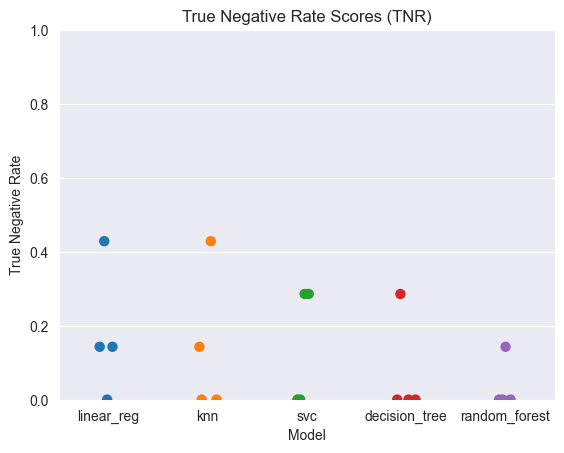

In [101]:
sns.set_style('darkgrid')
sns.stripplot(data = tnr, size=7.5)
plt.ylabel('True Negative Rate')
plt.xlabel('Model')
plt.ylim(0,1)
plt.title('True Negative Rate Scores (TNR)')
plt.show()

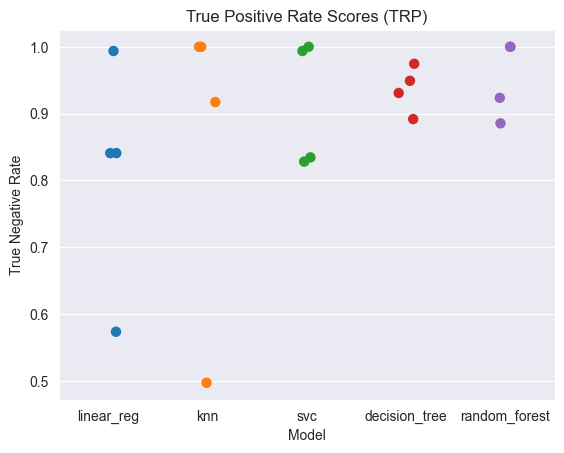

In [102]:
sns.stripplot(data = tpr, size=7.5)
plt.ylabel('True Negative Rate')
plt.xlabel('Model')
plt.title('True Positive Rate Scores (TRP)')
plt.show()